# Case Map For São Paulo - Brazil

First step: get the data for São Paulo.

The state reports 


In [27]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
casos_em_sp = pd.read_csv("https://www.seade.gov.br/wp-content/uploads/2020/04/Dados-covid-19-Est-SP.csv", sep = ";", encoding = "latin" )

In [28]:
casos_em_sp

,Total de casos,Casos por dia,Óbitos por dia,Data,Município,Mun_Total de casos,Mun_Total de óbitos,Cód IBGE,Latitude,Longitude,Municípios atingidos
0,1.0,1.0,NaN,26 fev,Águas de Lindóia,1,0,3500501.0,"-22,4733","-46,6314",121.0
1,0.0,0.0,NaN,27 fev,Agudos,1,0,3500709.0,"-22,4694","-48,9863",NaN
2,0.0,0.0,NaN,28 fev,Americana,3,2,3501608.0,"-22,7374","-47,3331",NaN
3,2.0,1.0,NaN,29 fev,Araçatuba,8,0,3502804.0,"-21,2076","-50,4401",NaN
4,0.0,0.0,NaN,01 mar,Araraquara,5,0,3503208.0,"-21,7845","-48,178",NaN
...,...,...,...,...,...,...,...,...,...,...,...
118,NaN,NaN,NaN,NaN,Vinhedo,1,0,3556701.0,"-23,0302","-46,9833",NaN
119,NaN,NaN,NaN,NaN,Votorantim,2,0,3557006.0,"-23,5446","-47,4388",NaN
120,NaN,NaN,NaN,NaN,Votuporanga,3,0,3557105.0,"-20,4237","-49,9781",NaN
121,NaN,NaN,NaN,NaN,Outros estados,36,0,NaN,NaN,NaN,NaN


In [29]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [30]:
# import shapefile using geopandas
sp_municipios_mapas = gpd.read_file("sao_paulo.shp")

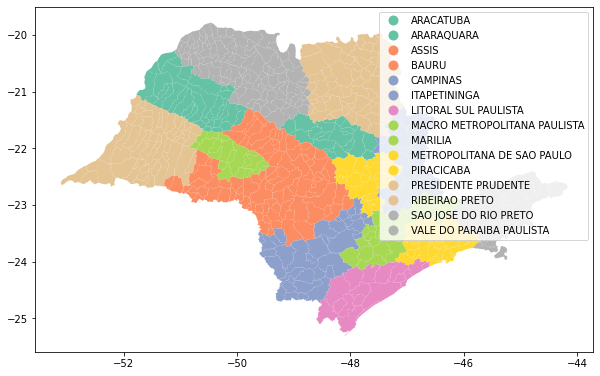

In [31]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
sp_municipios_mapas.plot(column='NOMEMESO', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax);

In [32]:
sp_municipios_mapas["CODMUNIC"] = sp_municipios_mapas["CODMUNIC"].astype(float)
sp_municipios_mapas = sp_municipios_mapas.merge(casos_em_sp, left_on="CODMUNIC", right_on="Cód IBGE", how = "left")
sp_municipios_mapas["CODMUNIC"]


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
650    3556305.0
651    3557105.0
652    3557154.0
653    3557204.0
654    3557303.0
Name: CODMUNIC, Length: 655, dtype: float64

In [33]:
sp_municipios_mapas["Mun_Total de óbitos"] = sp_municipios_mapas["Mun_Total de óbitos"].fillna(0)
sp_municipios_mapas["Mun_Total de casos"] = sp_municipios_mapas["Mun_Total de casos"].fillna(0)

sp_municipios_mapas["obitos_categorizados"] = pd.cut(sp_municipios_mapas["Mun_Total de óbitos"],
                                                    bins = [-1,1,3,6,10,50,200, 100000000],
                                                   labels = ["0", "1-3", "4-6", "6-10", "11-50","51-200", ">201"])

sp_municipios_mapas["casos_categorizados"] = pd.cut(sp_municipios_mapas["Mun_Total de casos"],
                                                    bins = [-1,1, 10,50,500,1000, 100000000],
                                                   labels = ["0", "1-10", "11-50", "51-500","501-1000", ">1000"])

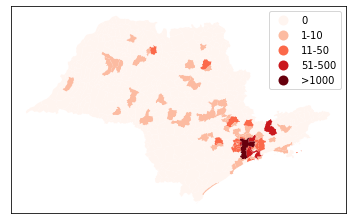

In [36]:
fig, ax = plt.subplots()

# quickly plot the data adding a legend
ax = sp_municipios_mapas.plot(column='casos_categorizados',
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45,
                         cmap = "Reds",
                              ax=ax);
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)


day = "07_april"

plt.savefig("sp_cases_" + day + ".png", dpi=300)



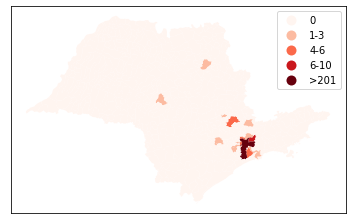

In [37]:
fig, ax = plt.subplots()

# quickly plot the data adding a legend
ax = sp_municipios_mapas.plot(column='obitos_categorizados', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Reds", ax=ax);

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.savefig("sp_deaths_" + day+ "_april.png")
